# 🎯 Stratified Shuffle Split for Reliable Model Evaluation

When building machine learning models, one of the most important steps is **splitting your dataset** into **training** and **test sets**. This ensures your model is evaluated on data it has never seen before — which is **critical** for assessing its ability to **generalize**.

---

## ⚠️ The Problem of Data Snooping Bias

**Data snooping bias** occurs when **information from the test set leaks** into the training process.

➡️ This leads to **overly optimistic performance metrics**
➡️ Models may **fail in real-world scenarios**

To avoid this, make sure the **test set is isolated** before any:

* 📊 Data exploration
* 🧠 Feature selection
* 🤖 Model training

---

## 🎲 Random Sampling: A Basic Approach

A simple method is to randomly shuffle the data and then split:

```python
import numpy as np
 
def shuffle_and_split_data(data, test_ratio):
    np.random.seed(42)  # Set the seed for reproducibility
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]
```

✅ **Reproducibility** is crucial — `np.random.seed(42)` ensures consistent results across runs.

⚠️ But pure random sampling might **miss important patterns**, especially if the dataset is **not evenly distributed**.

---

## 📊 Stratified Sampling to the Rescue

To ensure important characteristics are **well-represented** in both the training and test sets, use **Stratified Sampling**.

### What is a Strata?

A **strata** is a **subgroup** of the data defined by a specific attribute.

**Stratified sampling** makes sure that each subgroup is proportionally represented in both sets.

---

## 💰 Example: Income-Based Stratification

Using the **California housing dataset**, `median_income` is a strong predictor of house prices.

Instead of random sampling, we can create **strata** based on **income levels**:

```python
import pandas as pd
import numpy as np

# Load the dataset
data = pd.read_csv("housing.csv")

# Create income categories
data["income_cat"] = pd.cut(data["median_income"],
                             bins=[0, 1.5, 3.0, 4.5, 6.0, np.inf],
                             labels=[1, 2, 3, 4, 5])
```

This creates a new column `income_cat` that bins the `median_income` into 5 categories.

### 📉 Visualize the Distribution

```python
import matplotlib.pyplot as plt

data["income_cat"].value_counts().sort_index().plot.bar(rot=0, grid=True)
plt.title("Income Categories Distribution")
plt.xlabel("Income Category")
plt.ylabel("Number of Instances")
plt.show()
```

---

## 🧪 Stratified Shuffle Split in Scikit-Learn

Scikit-learn makes this easy with `StratifiedShuffleSplit`:

```python
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(data, data["income_cat"]):
    strat_train_set = data.loc[train_index]
    strat_test_set = data.loc[test_index]
```

✅ This ensures the **income distribution** in both sets is **similar** to that of the full dataset.

🔒 This helps **reduce sampling bias** and makes your model evaluation more **reliable**.

---

## ✅ Summary

| Method                | Preserves Distribution? | Risk of Bias? |
| --------------------- | ----------------------- | ------------- |
| ❌ Random Sampling     | No                      | Higher        |
| ✅ Stratified Sampling | Yes                     | Lower         |

---

📌 **Pro Tip**: After splitting, don’t forget to **remove the `income_cat` column** so it doesn’t influence the model!

---

💡 **Using stratified sampling helps build fairer, more accurate, and more reliable machine learning models!** 🧠🚀

In [2]:
import pandas as pd
import numpy as np

In [3]:
data = pd.read_csv("xlsx/California Housing Prices/housing.csv")

In [4]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
data["income_cat"] = pd.cut(data["median_income"], bins=[0, 1.5, 3.0, 4.5, 6.0, np.inf], labels=[1, 2, 3, 4, 5])

In [6]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3


In [7]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Number of Instances')

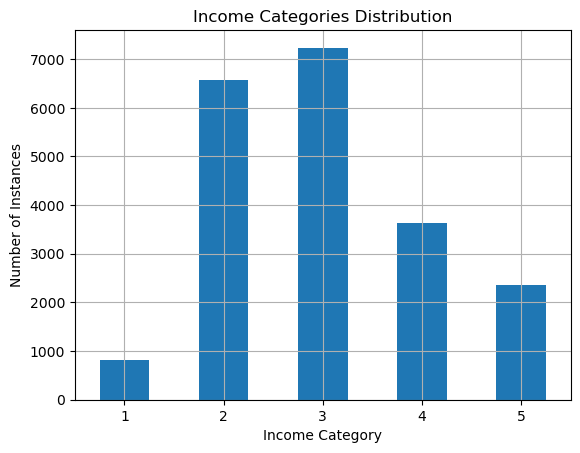

In [8]:
data["income_cat"].value_counts().sort_index().plot.bar(rot=0, grid=True)
plt.title("Income Categories Distribution")
plt.xlabel("Income Category")
plt.ylabel("Number of Instances")

In [9]:
from sklearn.model_selection import StratifiedShuffleSplit

In [10]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

In [11]:
for train_index, test_index in split.split(data, data["income_cat"]):
    strat_train_set = data.loc[train_index]
    strat_test_set = data.loc[test_index]

In [12]:
strat_train_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,72100.0,INLAND,2
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,279600.0,NEAR OCEAN,5
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,82700.0,INLAND,2
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,112500.0,NEAR OCEAN,2
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,238300.0,<1H OCEAN,3


Text(0, 0.5, 'Number of Instances')

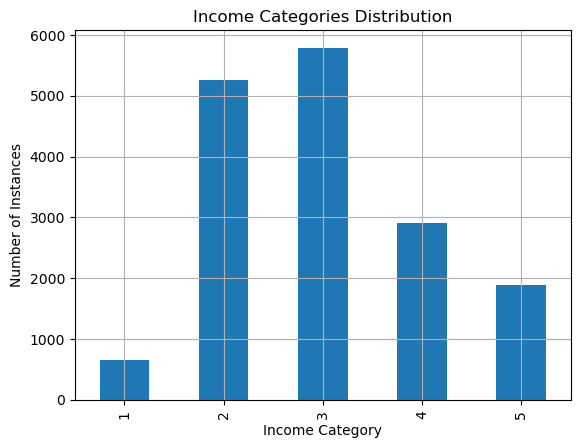

In [38]:
strat_train_set["income_cat"].value_counts().sort_index().plot.bar(grid=True)
plt.title("Income Categories Distribution")
plt.xlabel("Income Category")
plt.ylabel("Number of Instances")

Text(0, 0.5, 'Number of Instances')

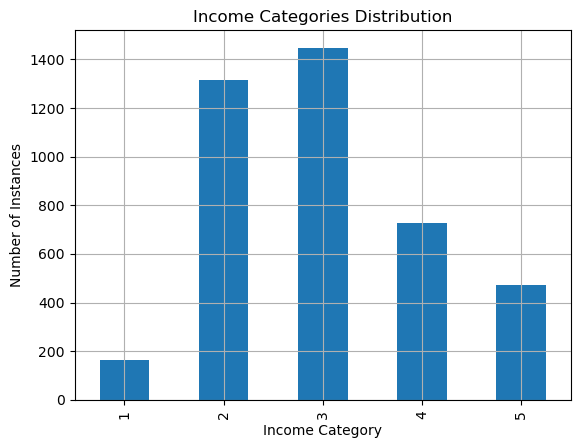

In [40]:
strat_test_set["income_cat"].value_counts().sort_index().plot.bar(grid=True)
plt.title("Income Categories Distribution")
plt.xlabel("Income Category")
plt.ylabel("Number of Instances")